# 2. Data Understanding - An√°lise Explorat√≥ria de Dados

## Aviso Educacional
Este conte√∫do √© destinado apenas para fins educacionais. Os dados exibidos s√£o ilustrativos e podem n√£o corresponder a situa√ß√µes reais.

---

## Objetivo
Realizar uma an√°lise explorat√≥ria profunda do mercado automotivo brasileiro, identificando padr√µes, anomalias e insights que guiar√£o as pr√≥ximas fases do CRISP-DM.

### Metodologia CRISP-DM - Fase 2: Data Understanding
1. **Coleta inicial de dados** ‚úÖ
2. **Descri√ß√£o dos dados** ‚è≥ (Esta etapa)
3. **Explora√ß√£o dos dados** ‚è≥ (Esta etapa) 
4. **Verifica√ß√£o da qualidade** ‚è≥ (Esta etapa)

## 1. Setup e Configura√ß√£o

In [22]:
# Importa√ß√µes principais
import sys
import os
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# An√°lise estat√≠stica
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Utilit√°rios
import warnings
import json
from datetime import datetime
from pathlib import Path

# M√≥dulo personalizado
from data.load_data import DataLoader, load_car_dataset

warnings.filterwarnings('ignore')

# Configura√ß√µes de visualiza√ß√£o profissional
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Configura√ß√µes do matplotlib
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# Configura√ß√µes do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Configura√ß√µes do plotly
import plotly.io as pio
pio.templates.default = "plotly_white"

print(" Setup conclu√≠do!")
print(f"Python: {sys.version}")
print(f"Pandas: {pd.__version__}")
print(f"NumPy: {np.__version__}")

 Setup conclu√≠do!
Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]
Pandas: 2.3.1
NumPy: 2.2.6


## 2. Carregamento e Inspe√ß√£o Inicial

In [23]:
# Carregamento usando nosso DataLoader personalizado
file_path = '../data/raw/dataset_carros_brasil.csv'

print(" Carregando dataset usando DataLoader personalizado...")
df, quality_report = load_car_dataset(file_path)

print(f" Dataset carregado com sucesso!")
print(f" Dimens√µes: {df.shape}")
print(f" Mem√≥ria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f" Carregado em: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

2025-09-28 18:05:26,604 - data.load_data - INFO - DataLoader inicializado com sucesso
2025-09-28 18:05:26,612 - data.load_data - INFO - Iniciando carregamento do dataset: ../data/raw/dataset_carros_brasil.csv
2025-09-28 18:05:26,628 - data.load_data - INFO - Dataset encontrado no cache, carregando...
2025-09-28 18:05:26,722 - data.load_data - INFO - Dataset carregado do cache: (10000, 9)
2025-09-28 18:05:26,725 - data.load_data - INFO - Gerando relat√≥rio de qualidade dos dados...


 Carregando dataset usando DataLoader personalizado...


2025-09-28 18:05:27,025 - data.load_data - INFO - Relat√≥rio de qualidade gerado com sucesso
2025-09-28 18:05:27,027 - data.load_data - INFO - Detectando anomalias espec√≠ficas do mercado automotivo...
2025-09-28 18:05:27,072 - data.load_data - INFO - Detec√ß√£o de anomalias conclu√≠da: 2 anomalias encontradas


 Dataset carregado com sucesso!
 Dimens√µes: (10000, 9)
 Mem√≥ria: 3.07 MB
 Carregado em: 2025-09-28 18:05:27


In [24]:
# Informa√ß√µes b√°sicas do dataset
print("=== INFORMA√á√ïES GERAIS DO DATASET ===")
print(f"N√∫mero de linhas: {df.shape[0]:,}")
print(f"N√∫mero de colunas: {df.shape[1]}")
print(f"\nColunas: {list(df.columns)}")

print("\n=== TIPOS DE DADOS ===")
info_df = pd.DataFrame({
    'Coluna': df.columns,
    'Tipo': df.dtypes,
    'N√£o-Nulos': df.count(),
    'Nulos': df.isnull().sum(),
    '√önicos': df.nunique(),
    '% √önicos': (df.nunique() / len(df) * 100).round(2)
})
display(info_df)

print("\n=== PRIMEIRAS 5 LINHAS ===")
display(df.head())

=== INFORMA√á√ïES GERAIS DO DATASET ===
N√∫mero de linhas: 10,000
N√∫mero de colunas: 9

Colunas: ['Marca', 'Modelo', 'Ano', 'Quilometragem', 'Cor', 'Cambio', 'Combustivel', 'Portas', 'Valor_Venda']

=== TIPOS DE DADOS ===


Coluna     Tipo  N√£o-Nulos  Nulos  √önicos  % √önicos
Marca                  Marca   object      10000      0      10      0.10
Modelo                Modelo   object      10000      0      32      0.32
Ano                      Ano  float64       9900    100      24      0.24
Quilometragem  Quilometragem  float64       9900    100    9652     96.52
Cor                      Cor   object      10000      0       6      0.06
Cambio                Cambio   object      10000      0       2      0.02
Combustivel      Combustivel   object      10000      0       3      0.03
Portas                Portas    int64      10000      0       2      0.02
Valor_Venda      Valor_Venda  float64      10000      0    9672     96.72


=== PRIMEIRAS 5 LINHAS ===


Marca    Modelo     Ano  Quilometragem    Cor      Cambio Combustivel  \
0     Ford  EcoSport 2003.00       82624.00   Azul  Autom√°tico        Flex   
1  Hyundai     HB20S 2017.00       69260.00   Azul  Autom√°tico      Diesel   
2     Jeep  Renegade 2008.00      106493.00  Cinza      Manual    Gasolina   
3   Toyota   Corolla 2018.00       53570.00  Prata  Autom√°tico        Flex   
4     Ford    Ranger 2009.00       21643.00  Prata      Manual        Flex   

   Portas  Valor_Venda  
0       4     52604.20  
1       2     63219.00  
2       2     79710.40  
3       2     99149.00  
4       2     68913.40

## 3. An√°lise de Qualidade dos Dados

In [25]:
# Relat√≥rio de qualidade autom√°tico
print("=== RELAT√ìRIO DE QUALIDADE AUTOM√ÅTICO ===")
print(f"Timestamp: {quality_report['timestamp']}")
print(f"\n Informa√ß√µes do Dataset:")
for key, value in quality_report['dataset_info'].items():
    print(f"  {key}: {value}")

print(f"\n Qualidade dos Dados:")
print(f"  Duplicatas: {quality_report['data_quality']['duplicates']}")
print(f"  Valores ausentes por coluna:")
for col, missing in quality_report['data_quality']['missing_values'].items():
    if missing > 0:
        print(f"    {col}: {missing} ({missing/len(df)*100:.2f}%)")

if all(v == 0 for v in quality_report['data_quality']['missing_values'].values()):
    print(" Nenhum valor ausente detectado!")

=== RELAT√ìRIO DE QUALIDADE AUTOM√ÅTICO ===
Timestamp: 2025-09-28T18:05:26.728431

 Informa√ß√µes do Dataset:
  shape: (10000, 9)
  memory_usage_mb: 3.015763282775879
  columns: ['Marca', 'Modelo', 'Ano', 'Quilometragem', 'Cor', 'Cambio', 'Combustivel', 'Portas', 'Valor_Venda']

 Qualidade dos Dados:
  Duplicatas: 0
  Valores ausentes por coluna:
    Ano: 100 (1.00%)
    Quilometragem: 100 (1.00%)


In [26]:
# Detec√ß√£o de anomalias espec√≠ficas do mercado automotivo
print("=== DETEC√á√ÉO DE ANOMALIAS ESPEC√çFICAS ===")
anomalies = quality_report['anomalies']

total_anomalies = sum(len(v) for v in anomalies.values())
print(f"Total de tipos de anomalias detectadas: {total_anomalies}")

for category, issues in anomalies.items():
    if issues:
        print(f"\n {category.replace('_', ' ').title()}:")
        for issue in issues:
            print(f"  ‚Ä¢ {issue}")
    else:
        print(f"\n {category.replace('_', ' ').title()}: Nenhuma anomalia detectada")

=== DETEC√á√ÉO DE ANOMALIAS ESPEC√çFICAS ===
Total de tipos de anomalias detectadas: 2

 Temporal Anomalies: Nenhuma anomalia detectada

 Business Logic Anomalies:
  ‚Ä¢ 992 carros antigos com baixa quilometragem
  ‚Ä¢ 200 carros com pre√ßos muito altos (>R$300k)

 Statistical Anomalies: Nenhuma anomalia detectada

 Data Quality Issues: Nenhuma anomalia detectada


## 4. An√°lise Estat√≠stica Descritiva

In [27]:
# Estat√≠sticas descritivas para vari√°veis num√©ricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"=== AN√ÅLISE DE VARI√ÅVEIS NUM√âRICAS ({len(numeric_cols)} vari√°veis) ===")
print(f"Vari√°veis: {numeric_cols}")

# Estat√≠sticas b√°sicas
desc_stats = df[numeric_cols].describe()
display(desc_stats)

# Estat√≠sticas adicionais
print("\n=== ESTAT√çSTICAS ADICIONAIS ===")
additional_stats = pd.DataFrame({
    'Assimetria': df[numeric_cols].skew(),
    'Curtose': df[numeric_cols].kurtosis(),
    'Coef_Varia√ß√£o': (df[numeric_cols].std() / df[numeric_cols].mean()) * 100
})
display(additional_stats.round(3))

=== AN√ÅLISE DE VARI√ÅVEIS NUM√âRICAS (4 vari√°veis) ===
Vari√°veis: ['Ano', 'Quilometragem', 'Portas', 'Valor_Venda']


Ano  Quilometragem   Portas  Valor_Venda
count 9900.00        9900.00 10000.00     10000.00
mean  2011.52       99805.34     3.01     83097.49
std      6.90       57760.42     1.00    166858.22
min   2000.00          10.00     2.00     10000.00
25%   2006.00       50712.75     2.00     44467.05
50%   2012.00       99751.00     4.00     58905.70
75%   2017.00      149429.75     4.00     74804.40
max   2023.00      199994.00     4.00   1241962.00


=== ESTAT√çSTICAS ADICIONAIS ===


Assimetria  Curtose  Coef_Varia√ß√£o
Ano                 -0.01    -1.20           0.34
Quilometragem       -0.00    -1.19          57.87
Portas              -0.02    -2.00          33.24
Valor_Venda          6.69    43.57         200.80

In [28]:
# Testes de normalidade
print("=== TESTES DE NORMALIDADE ===")
normality_results = []

for col in numeric_cols:
    # Teste de Shapiro-Wilk (para amostras pequenas)
    if len(df[col].dropna()) <= 5000:
        stat_sw, p_sw = shapiro(df[col].dropna().sample(min(5000, len(df[col].dropna()))))
        is_normal_sw = p_sw > 0.05
    else:
        stat_sw, p_sw, is_normal_sw = np.nan, np.nan, "N/A"
    
    # Teste de D'Agostino-Pearson
    stat_dp, p_dp = normaltest(df[col].dropna())
    is_normal_dp = p_dp > 0.05
    
    normality_results.append({
        'Vari√°vel': col,
        'Shapiro_p': p_sw,
        'Normal_Shapiro': is_normal_sw,
        'DAgostino_p': p_dp,
        'Normal_DAgostino': is_normal_dp
    })

normality_df = pd.DataFrame(normality_results)
display(normality_df)

=== TESTES DE NORMALIDADE ===


Vari√°vel  Shapiro_p Normal_Shapiro  DAgostino_p  Normal_DAgostino
0            Ano        NaN            N/A         0.00             False
1  Quilometragem        NaN            N/A         0.00             False
2         Portas        NaN            N/A         0.00             False
3    Valor_Venda        NaN            N/A         0.00             False

In [29]:
# An√°lise de vari√°veis categ√≥ricas
print(f"=== AN√ÅLISE DE VARI√ÅVEIS CATEG√ìRICAS ({len(categorical_cols)} vari√°veis) ===")
print(f"Vari√°veis: {categorical_cols}")

for col in categorical_cols:
    print(f"\n {col.upper()}:")
    value_counts = df[col].value_counts()
    print(f"  Valores √∫nicos: {df[col].nunique()}")
    print(f"  Valor mais frequente: {value_counts.index[0]} ({value_counts.iloc[0]} ocorr√™ncias)")
    print(f"  Top 5 valores:")
    for idx, (value, count) in enumerate(value_counts.head(5).items()):
        percentage = (count / len(df)) * 100
        print(f"    {idx+1}. {value}: {count} ({percentage:.1f}%)")

=== AN√ÅLISE DE VARI√ÅVEIS CATEG√ìRICAS (5 vari√°veis) ===
Vari√°veis: ['Marca', 'Modelo', 'Cor', 'Cambio', 'Combustivel']

 MARCA:
  Valores √∫nicos: 10
  Valor mais frequente: Volkswagen (1053 ocorr√™ncias)
  Top 5 valores:
    1. Volkswagen: 1053 (10.5%)
    2. Nissan: 1034 (10.3%)
    3. Honda: 1021 (10.2%)
    4. Ford: 1017 (10.2%)
    5. Fiat: 996 (10.0%)

 MODELO:
  Valores √∫nicos: 32
  Valor mais frequente: Compass (493 ocorr√™ncias)
  Top 5 valores:
    1. Compass: 493 (4.9%)
    2. Renegade: 474 (4.7%)
    3. Frontier: 363 (3.6%)
    4. Kicks: 358 (3.6%)
    5. Duster: 355 (3.5%)

 COR:
  Valores √∫nicos: 6
  Valor mais frequente: Azul (1739 ocorr√™ncias)
  Top 5 valores:
    1. Azul: 1739 (17.4%)
    2. Cinza: 1720 (17.2%)
    3. Preto: 1700 (17.0%)
    4. Branco: 1652 (16.5%)
    5. Vermelho: 1599 (16.0%)

 CAMBIO:
  Valores √∫nicos: 2
  Valor mais frequente: Autom√°tico (5051 ocorr√™ncias)
  Top 5 valores:
    1. Autom√°tico: 5051 (50.5%)
    2. Manual: 4949 (49.5%)

 COM

## 5. An√°lise da Vari√°vel Target (Valor_Venda)

In [30]:
# An√°lise profunda da vari√°vel target
target = 'Valor_Venda'

print(f"=== AN√ÅLISE DETALHADA DA VARI√ÅVEL TARGET: {target} ===")

# Estat√≠sticas centrais
mean_price = df[target].mean()
median_price = df[target].median()
std_price = df[target].std()
min_price = df[target].min()
max_price = df[target].max()

print(f" Estat√≠sticas Centrais:")
print(f"  M√©dia: R$ {mean_price:,.2f}")
print(f"  Mediana: R$ {median_price:,.2f}")
print(f"  Diferen√ßa M√©dia-Mediana: R$ {abs(mean_price - median_price):,.2f}")
print(f"  Desvio Padr√£o: R$ {std_price:,.2f}")
print(f"  Coeficiente de Varia√ß√£o: {(std_price/mean_price)*100:.1f}%")

print(f"\n Extremos:")
print(f"  Valor M√≠nimo: R$ {min_price:,.2f}")
print(f"  Valor M√°ximo: R$ {max_price:,.2f}")
print(f"  Amplitude: R$ {max_price - min_price:,.2f}")

# Quartis e percentis
print(f"\n Distribui√ß√£o (Quartis):")
quartiles = df[target].quantile([0.25, 0.5, 0.75])
for q, value in quartiles.items():
    print(f"  Q{int(q*4)} ({q*100:.0f}%): R$ {value:,.2f}")

print(f"\n Percentis Espec√≠ficos:")
percentiles = [0.1, 0.9, 0.95, 0.99]
for p in percentiles:
    value = df[target].quantile(p)
    print(f"  P{int(p*100)}: R$ {value:,.2f}")

=== AN√ÅLISE DETALHADA DA VARI√ÅVEL TARGET: Valor_Venda ===
 Estat√≠sticas Centrais:
  M√©dia: R$ 83,097.49
  Mediana: R$ 58,905.70
  Diferen√ßa M√©dia-Mediana: R$ 24,191.79
  Desvio Padr√£o: R$ 166,858.22
  Coeficiente de Varia√ß√£o: 200.8%

 Extremos:
  Valor M√≠nimo: R$ 10,000.00
  Valor M√°ximo: R$ 1,241,962.00
  Amplitude: R$ 1,231,962.00

 Distribui√ß√£o (Quartis):
  Q1 (25%): R$ 44,467.05
  Q2 (50%): R$ 58,905.70
  Q3 (75%): R$ 74,804.40

 Percentis Espec√≠ficos:
  P10: R$ 33,032.66
  P90: R$ 90,299.10
  P95: R$ 100,878.67
  P99: R$ 1,241,962.00


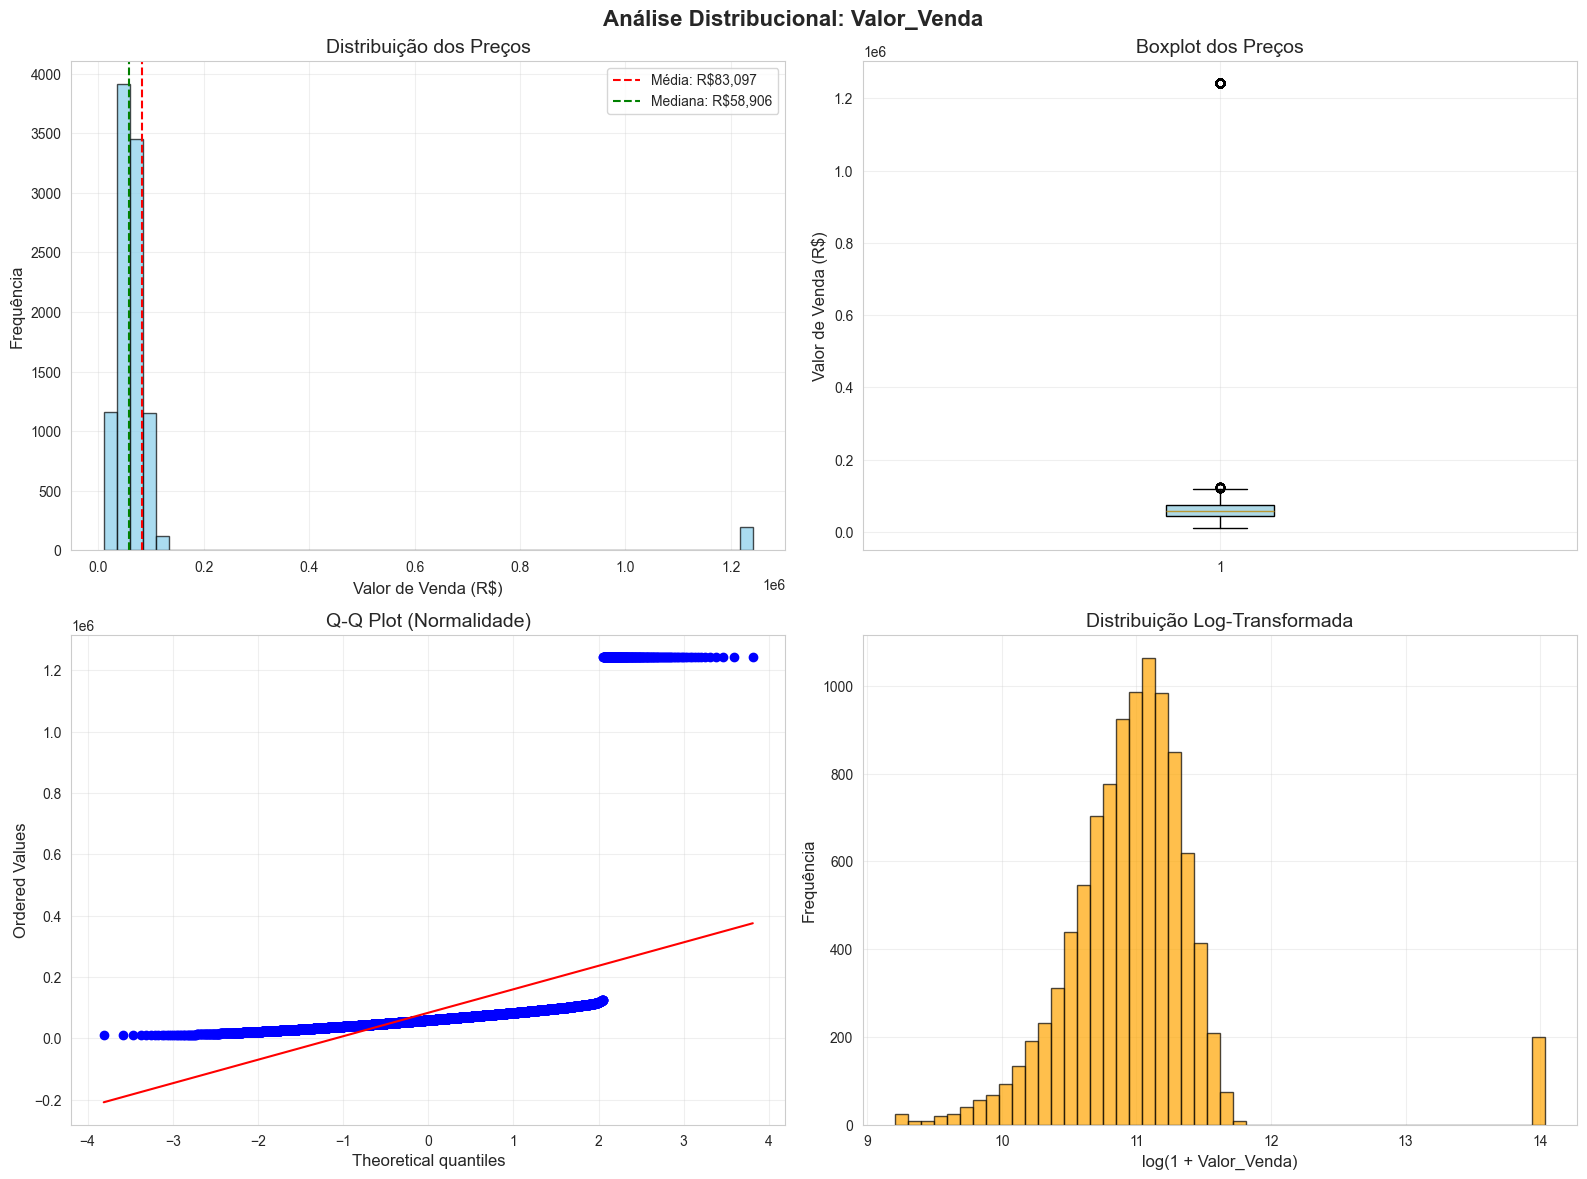


 Caracter√≠sticas da Distribui√ß√£o:
  Assimetria: 6.693 (Positiva - cauda √† direita)
  Curtose: 43.568 (Leptoc√∫rtica - mais pontiaguda)


In [31]:
# Visualiza√ß√£o da distribui√ß√£o da vari√°vel target
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'An√°lise Distribucional: {target}', fontsize=16, fontweight='bold')

# Histograma
axes[0,0].hist(df[target], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(mean_price, color='red', linestyle='--', label=f'M√©dia: R${mean_price:,.0f}')
axes[0,0].axvline(median_price, color='green', linestyle='--', label=f'Mediana: R${median_price:,.0f}')
axes[0,0].set_title('Distribui√ß√£o dos Pre√ßos')
axes[0,0].set_xlabel('Valor de Venda (R$)')
axes[0,0].set_ylabel('Frequ√™ncia')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Boxplot
bp = axes[0,1].boxplot(df[target], patch_artist=True)
bp['boxes'][0].set_facecolor('lightblue')
axes[0,1].set_title('Boxplot dos Pre√ßos')
axes[0,1].set_ylabel('Valor de Venda (R$)')
axes[0,1].grid(True, alpha=0.3)

# Q-Q Plot
stats.probplot(df[target], dist="norm", plot=axes[1,0])
axes[1,0].set_title('Q-Q Plot (Normalidade)')
axes[1,0].grid(True, alpha=0.3)

# Distribui√ß√£o log-transformada
log_prices = np.log1p(df[target])  # log(1+x) para evitar log(0)
axes[1,1].hist(log_prices, bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,1].set_title('Distribui√ß√£o Log-Transformada')
axes[1,1].set_xlabel('log(1 + Valor_Venda)')
axes[1,1].set_ylabel('Frequ√™ncia')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# An√°lise de assimetria e curtose
skewness = df[target].skew()
kurt = df[target].kurtosis()

print(f"\n Caracter√≠sticas da Distribui√ß√£o:")
print(f"  Assimetria: {skewness:.3f} {'(Positiva - cauda √† direita)' if skewness > 0 else '(Negativa - cauda √† esquerda)' if skewness < 0 else '(Sim√©trica)'}")
print(f"  Curtose: {kurt:.3f} {'(Leptoc√∫rtica - mais pontiaguda)' if kurt > 0 else '(Platic√∫rtica - mais achatada)' if kurt < 0 else '(Mesoc√∫rtica - normal)'}")

## 6. An√°lise de Outliers Multicamada

In [32]:
# Detec√ß√£o de outliers usando m√∫ltiplos m√©todos
print("=== AN√ÅLISE DE OUTLIERS MULTICAMADA ===")

def detect_outliers_zscore(data, threshold=3):
    """Detec√ß√£o usando Z-score"""
    z_scores = np.abs(stats.zscore(data.dropna()))
    return data[z_scores > threshold]

def detect_outliers_iqr(data, factor=1.5):
    """Detec√ß√£o usando IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

def detect_outliers_isolation_forest(data, contamination=0.1):
    """Detec√ß√£o usando Isolation Forest"""
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(data.values.reshape(-1, 1))
    return data[outlier_labels == -1]

# An√°lise para cada vari√°vel num√©rica
outlier_summary = []

for col in numeric_cols:
    data = df[col].dropna()
    
    # M√©todos de detec√ß√£o
    outliers_zscore = detect_outliers_zscore(data)
    outliers_iqr = detect_outliers_iqr(data)
    outliers_iso = detect_outliers_isolation_forest(data)
    
    outlier_summary.append({
        'Vari√°vel': col,
        'Z-Score': len(outliers_zscore),
        'IQR': len(outliers_iqr),
        'Isolation_Forest': len(outliers_iso),
        'Z-Score_%': (len(outliers_zscore) / len(data)) * 100,
        'IQR_%': (len(outliers_iqr) / len(data)) * 100,
        'Isolation_%': (len(outliers_iso) / len(data)) * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.round(2))

=== AN√ÅLISE DE OUTLIERS MULTICAMADA ===


Vari√°vel  Z-Score  IQR  Isolation_Forest  Z-Score_%  IQR_%  \
0            Ano        0    0               814       0.00   0.00   
1  Quilometragem        0    0               990       0.00   0.00   
2         Portas        0    0                 0       0.00   0.00   
3    Valor_Venda      200  217               996       2.00   2.17   

   Isolation_%  
0         8.22  
1        10.00  
2         0.00  
3         9.96

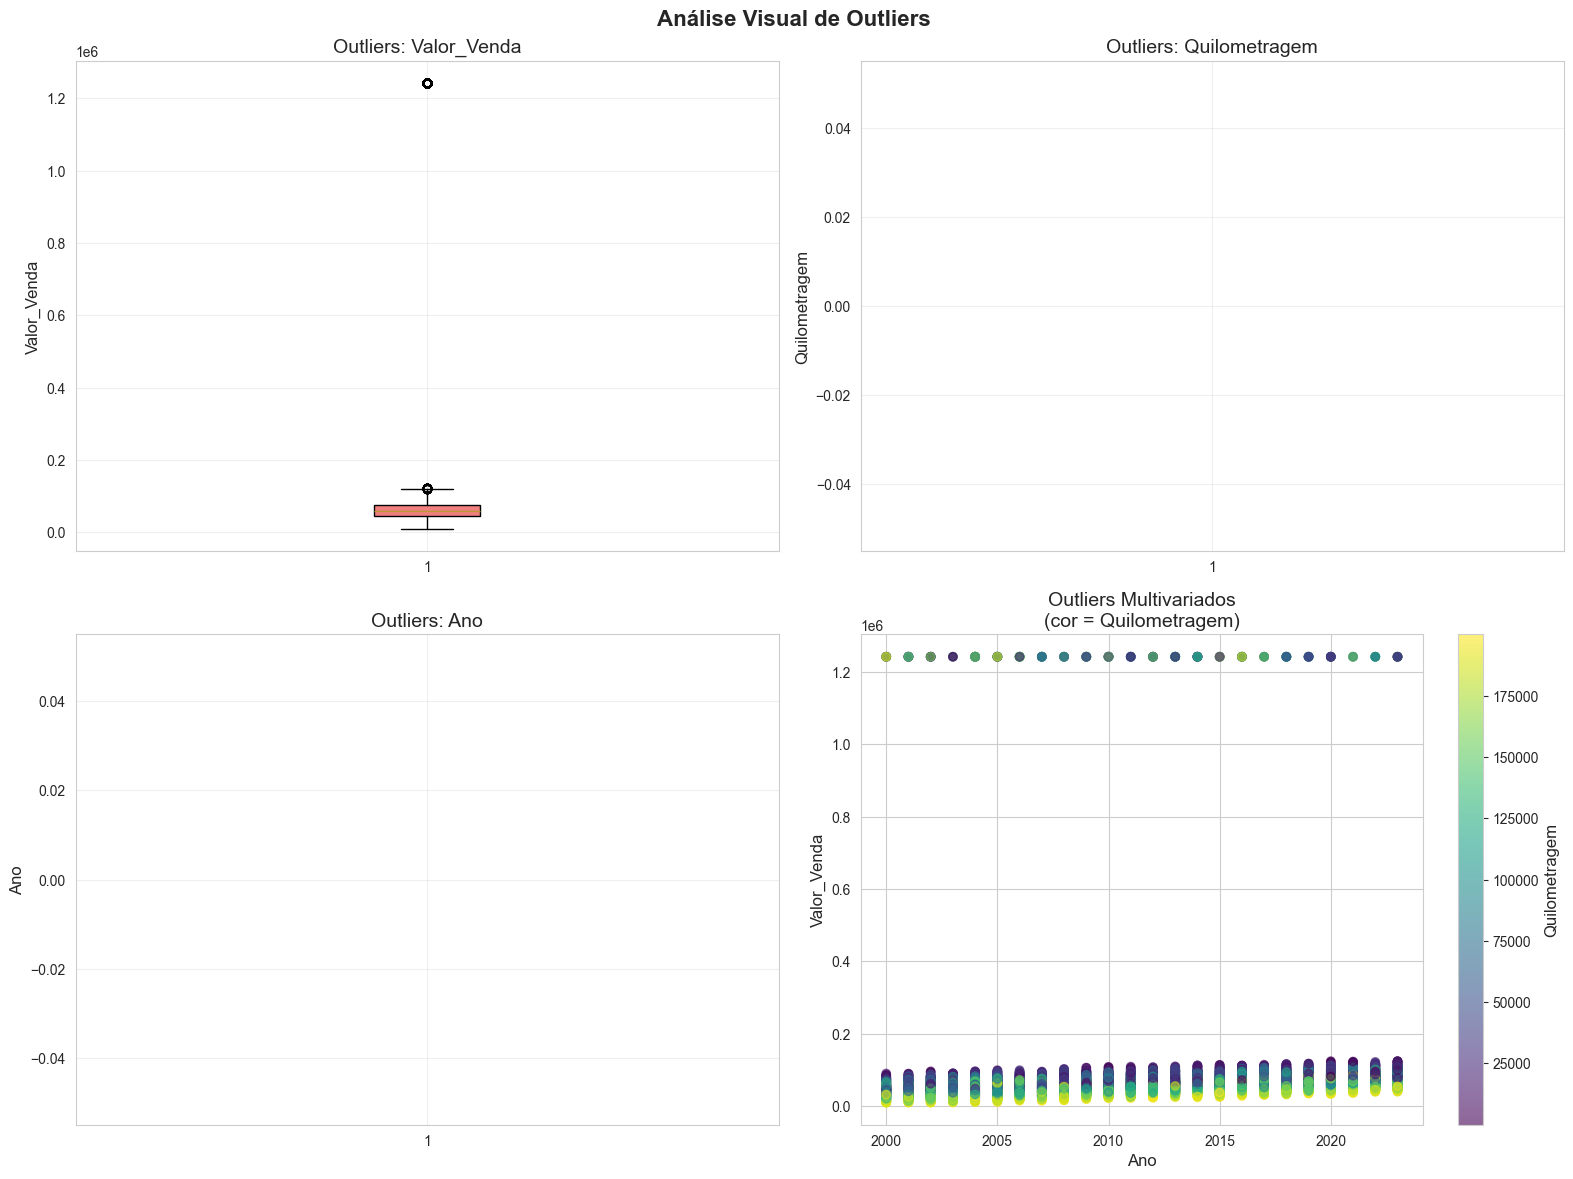

In [33]:
# Visualiza√ß√£o de outliers para vari√°veis principais
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('An√°lise Visual de Outliers', fontsize=16, fontweight='bold')

main_vars = ['Valor_Venda', 'Quilometragem', 'Ano']

for i, var in enumerate(main_vars[:3]):
    row = i // 2
    col = i % 2
    
    # Boxplot
    bp = axes[row, col].boxplot(df[var], patch_artist=True)
    bp['boxes'][0].set_facecolor('lightcoral')
    axes[row, col].set_title(f'Outliers: {var}')
    axes[row, col].set_ylabel(var)
    axes[row, col].grid(True, alpha=0.3)

# Scatter plot multivariado para detectar outliers
axes[1, 1].scatter(df['Ano'], df['Valor_Venda'], alpha=0.6, c=df['Quilometragem'], cmap='viridis')
axes[1, 1].set_xlabel('Ano')
axes[1, 1].set_ylabel('Valor_Venda')
axes[1, 1].set_title('Outliers Multivariados\n(cor = Quilometragem)')
cbar = plt.colorbar(axes[1, 1].collections[0], ax=axes[1, 1])
cbar.set_label('Quilometragem')

plt.tight_layout()
plt.show()

## 7. An√°lise de Correla√ß√µes e Padr√µes

=== AN√ÅLISE DE CORRELA√á√ïES ===


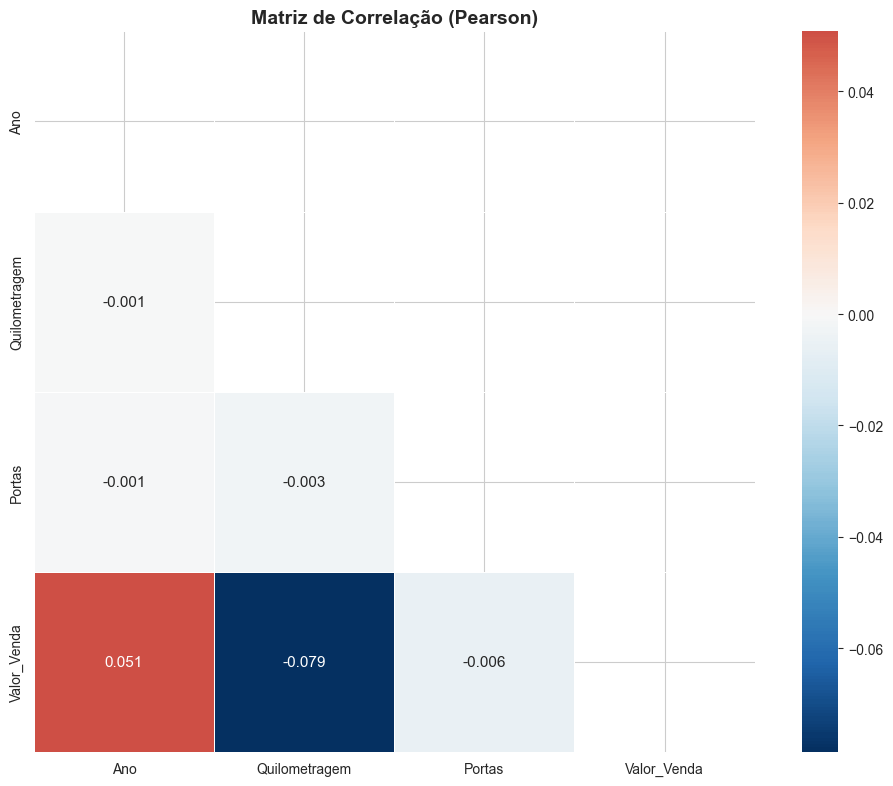


 Correla√ß√µes com Valor_Venda (em ordem decrescente):
  Quilometragem: 0.079 (correla√ß√£o fraca negativa)
  Ano: 0.051 (correla√ß√£o fraca positiva)
  Portas: 0.006 (correla√ß√£o fraca negativa)


In [34]:
# Matriz de correla√ß√£o completa
print("=== AN√ÅLISE DE CORRELA√á√ïES ===")

# Correla√ß√£o de Pearson
correlation_matrix = df[numeric_cols].corr()

# Visualiza√ß√£o da matriz de correla√ß√£o
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # M√°scara para metade superior
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            linewidths=0.5,
            mask=mask,
            fmt='.3f')
plt.title('Matriz de Correla√ß√£o (Pearson)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Correla√ß√µes com a vari√°vel target
target_corr = correlation_matrix[target].abs().sort_values(ascending=False)
print(f"\n Correla√ß√µes com {target} (em ordem decrescente):")
for var, corr in target_corr.items():
    if var != target:
        direction = "positiva" if correlation_matrix[target][var] > 0 else "negativa"
        strength = "forte" if abs(corr) > 0.7 else "moderada" if abs(corr) > 0.3 else "fraca"
        print(f"  {var}: {corr:.3f} (correla√ß√£o {strength} {direction})")

In [35]:
# Correla√ß√µes n√£o-lineares (Spearman)
spearman_corr = df[numeric_cols].corr(method='spearman')

# Compara√ß√£o Pearson vs Spearman
print("\n COMPARA√á√ÉO: PEARSON vs SPEARMAN")
comparison_data = []
for var in numeric_cols:
    if var != target:
        pearson_val = correlation_matrix[target][var]
        spearman_val = spearman_corr[target][var]
        difference = abs(pearson_val - spearman_val)
        
        comparison_data.append({
            'Vari√°vel': var,
            'Pearson': pearson_val,
            'Spearman': spearman_val,
            'Diferen√ßa': difference,
            'N√£o-Linear': 'Sim' if difference > 0.1 else 'N√£o'
        })

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df.round(3))


 COMPARA√á√ÉO: PEARSON vs SPEARMAN


Vari√°vel  Pearson  Spearman  Diferen√ßa N√£o-Linear
0            Ano     0.05      0.46       0.41        Sim
1  Quilometragem    -0.08     -0.52       0.44        Sim
2         Portas    -0.01      0.00       0.01        N√£o

In [36]:
# An√°lise de associa√ß√£o para vari√°veis categ√≥ricas (Cram√©r's V)
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """Calcula o V de Cram√©r para associa√ß√£o entre vari√°veis categ√≥ricas"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("\nüîó ASSOCIA√á√ïES ENTRE VARI√ÅVEIS CATEG√ìRICAS (V de Cram√©r)")
categorical_associations = []

for i, var1 in enumerate(categorical_cols):
    for var2 in categorical_cols[i+1:]:
        try:
            cramers = cramers_v(df[var1], df[var2])
            strength = "forte" if cramers > 0.6 else "moderada" if cramers > 0.3 else "fraca"
            categorical_associations.append({
                'Vari√°vel_1': var1,
                'Vari√°vel_2': var2,
                'Cramers_V': cramers,
                'For√ßa': strength
            })
        except:
            pass

if categorical_associations:
    assoc_df = pd.DataFrame(categorical_associations).sort_values('Cramers_V', ascending=False)
    display(assoc_df.round(3))
else:
    print("Nenhuma associa√ß√£o categ√≥rica calculada.")


üîó ASSOCIA√á√ïES ENTRE VARI√ÅVEIS CATEG√ìRICAS (V de Cram√©r)


Vari√°vel_1   Vari√°vel_2  Cramers_V  For√ßa
0      Marca       Modelo       1.00  forte
5     Modelo       Cambio       0.01  fraca
1      Marca          Cor       0.00  fraca
2      Marca       Cambio       0.00  fraca
3      Marca  Combustivel       0.00  fraca
4     Modelo          Cor       0.00  fraca
6     Modelo  Combustivel       0.00  fraca
7        Cor       Cambio       0.00  fraca
8        Cor  Combustivel       0.00  fraca
9     Cambio  Combustivel       0.00  fraca

## 8. Visualiza√ß√µes Profissionais e Interativas

In [37]:
# An√°lise temporal dos pre√ßos por ano
print("=== AN√ÅLISE TEMPORAL: PRE√áOS POR ANO ===")

# Estat√≠sticas por ano
yearly_stats = df.groupby('Ano')['Valor_Venda'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

# Gr√°fico interativo com Plotly
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Pre√ßo M√©dio por Ano', 'Volume de Vendas por Ano', 
                   'Variabilidade (Desvio Padr√£o)', 'Amplitude de Pre√ßos'),
    specs=[[{'secondary_y': False}, {'secondary_y': False}],
           [{'secondary_y': False}, {'secondary_y': False}]]
)

# Pre√ßo m√©dio
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['mean'],
               mode='lines+markers', name='Pre√ßo M√©dio',
               line=dict(color='blue', width=3)),
    row=1, col=1
)

# Volume de vendas
fig.add_trace(
    go.Bar(x=yearly_stats.index, y=yearly_stats['count'],
           name='Volume', marker_color='green'),
    row=1, col=2
)

# Variabilidade
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=yearly_stats['std'],
               mode='lines+markers', name='Desvio Padr√£o',
               line=dict(color='orange', width=2)),
    row=2, col=1
)

# Amplitude
amplitude = yearly_stats['max'] - yearly_stats['min']
fig.add_trace(
    go.Scatter(x=yearly_stats.index, y=amplitude,
               mode='lines+markers', name='Amplitude',
               line=dict(color='red', width=2)),
    row=2, col=2
)

fig.update_layout(height=700, title_text="An√°lise Temporal do Mercado Automotivo")
fig.show()

# Insights temporais
current_year = datetime.now().year
recent_years = yearly_stats[yearly_stats.index >= current_year - 5]
print(f"\n Insights Temporais (√∫ltimos 5 anos):")
print(f"  Pre√ßo m√©dio mais alto: {yearly_stats['mean'].max():,.2f} (ano {yearly_stats['mean'].idxmax()})")
print(f"  Pre√ßo m√©dio mais baixo: {yearly_stats['mean'].min():,.2f} (ano {yearly_stats['mean'].idxmin()})")
print(f"  Maior volume de vendas: {yearly_stats['count'].max()} (ano {yearly_stats['count'].idxmax()})")

=== AN√ÅLISE TEMPORAL: PRE√áOS POR ANO ===



 Insights Temporais (√∫ltimos 5 anos):
  Pre√ßo m√©dio mais alto: 99,026.48 (ano 2023.0)
  Pre√ßo m√©dio mais baixo: 59,929.92 (ano 2003.0)
  Maior volume de vendas: 448 (ano 2015.0)


In [38]:
# An√°lise de market share por marca
print("=== AN√ÅLISE DE MARKET SHARE POR MARCA ===")

brand_analysis = df.groupby('Marca').agg({
    'Valor_Venda': ['count', 'mean', 'median', 'std'],
    'Quilometragem': 'mean',
    'Ano': 'mean'
}).round(2)

# Flatten column names
brand_analysis.columns = ['Volume', 'Preco_Medio', 'Preco_Mediano', 'Desvio_Preco', 'Km_Medio', 'Ano_Medio']
brand_analysis['Market_Share'] = (brand_analysis['Volume'] / len(df) * 100).round(2)
brand_analysis = brand_analysis.sort_values('Volume', ascending=False)

# Top 10 marcas
top_brands = brand_analysis.head(10)

# Visualiza√ß√£o interativa do market share
fig = px.treemap(top_brands.reset_index(), 
                 path=['Marca'], 
                 values='Volume',
                 color='Preco_Medio',
                 color_continuous_scale='Viridis',
                 title='Market Share por Marca (Top 10)')
fig.update_layout(height=600)
fig.show()

# Gr√°fico de dispers√£o: Volume vs Pre√ßo M√©dio
fig2 = px.scatter(brand_analysis.reset_index(), 
                  x='Volume', 
                  y='Preco_Medio',
                  size='Market_Share',
                  hover_name='Marca',
                  title='Posicionamento de Marcas: Volume vs Pre√ßo M√©dio')
fig2.update_layout(height=500)
fig2.show()

print(f"\n Top 5 Marcas por Volume:")
for i, (marca, data) in enumerate(top_brands.head(5).iterrows()):
    print(f"  {i+1}. {marca}: {data['Volume']} vendas ({data['Market_Share']}% do mercado)")

print(f"\n Top 5 Marcas por Pre√ßo M√©dio:")
top_price_brands = brand_analysis.sort_values('Preco_Medio', ascending=False).head(5)
for i, (marca, data) in enumerate(top_price_brands.iterrows()):
    print(f"  {i+1}. {marca}: R$ {data['Preco_Medio']:,.2f} (m√©dio)")

=== AN√ÅLISE DE MARKET SHARE POR MARCA ===



 Top 5 Marcas por Volume:
  1. Volkswagen: 1053.0 vendas (10.53% do mercado)
  2. Nissan: 1034.0 vendas (10.34% do mercado)
  3. Honda: 1021.0 vendas (10.21% do mercado)
  4. Ford: 1017.0 vendas (10.17% do mercado)
  5. Fiat: 996.0 vendas (9.96% do mercado)

 Top 5 Marcas por Pre√ßo M√©dio:
  1. Jeep: R$ 104,915.94 (m√©dio)
  2. Toyota: R$ 97,451.49 (m√©dio)
  3. Nissan: R$ 89,531.31 (m√©dio)
  4. Honda: R$ 89,507.25 (m√©dio)
  5. Fiat: R$ 80,402.21 (m√©dio)


## 9. Insights Anal√≠ticos √önicos

In [39]:
# 1. An√°lise de Elasticidade de Pre√ßo por Quilometragem por Marca
print("=== INSIGHT 1: ELASTICIDADE PRE√áO-QUILOMETRAGEM POR MARCA ===")

elasticity_analysis = []

for marca in df['Marca'].value_counts().head(10).index:
    marca_data = df[df['Marca'] == marca]
    
    # Calcular correla√ß√£o pre√ßo-quilometragem
    corr_price_km = marca_data['Valor_Venda'].corr(marca_data['Quilometragem'])
    
    # Calcular elasticidade aproximada (varia√ß√£o % pre√ßo / varia√ß√£o % km)
    if len(marca_data) > 10:  # Apenas para marcas com dados suficientes
        # Dividir em quartis de quilometragem
        marca_data['Km_Quartil'] = pd.qcut(marca_data['Quilometragem'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        quartil_prices = marca_data.groupby('Km_Quartil')['Valor_Venda'].mean()
        
        # Elasticidade = (% mudan√ßa pre√ßo) / (% mudan√ßa km)
        if len(quartil_prices) == 4:
            price_change = ((quartil_prices['Q4'] - quartil_prices['Q1']) / quartil_prices['Q1']) * 100
            elasticity = price_change / 100  # Aproxima√ß√£o simples
        else:
            elasticity = np.nan
    else:
        elasticity = np.nan
    
    elasticity_analysis.append({
        'Marca': marca,
        'Correlacao_Preco_Km': corr_price_km,
        'Elasticidade_Aproximada': elasticity,
        'Volume_Vendas': len(marca_data),
        'Preco_Medio': marca_data['Valor_Venda'].mean()
    })

elasticity_df = pd.DataFrame(elasticity_analysis).dropna()
elasticity_df = elasticity_df.sort_values('Elasticidade_Aproximada', ascending=False)

print("Elasticidade Pre√ßo-Quilometragem por Marca:")
display(elasticity_df.round(3))

# Interpreta√ß√£o
most_elastic = elasticity_df.iloc[0]['Marca']
least_elastic = elasticity_df.iloc[-1]['Marca']
print(f"\n Insights:")
print(f"  ‚Ä¢ Marca mais sens√≠vel √† quilometragem: {most_elastic}")
print(f"  ‚Ä¢ Marca menos sens√≠vel √† quilometragem: {least_elastic}")
print(f"  ‚Ä¢ Isso sugere diferentes estrat√©gias de precifica√ß√£o e posicionamento no mercado")

=== INSIGHT 1: ELASTICIDADE PRE√áO-QUILOMETRAGEM POR MARCA ===
Elasticidade Pre√ßo-Quilometragem por Marca:


Marca  Correlacao_Preco_Km  Elasticidade_Aproximada  Volume_Vendas  \
3        Ford                -0.03                    -0.02           1017   
4        Fiat                -0.01                    -0.21            996   
8        Jeep                -0.09                    -0.30            967   
0  Volkswagen                -0.06                    -0.32           1053   
5     Renault                -0.07                    -0.37            994   
7     Hyundai                -0.10                    -0.39            971   
6   Chevrolet                -0.08                    -0.42            985   
9      Toyota                -0.12                    -0.43            962   
2       Honda                -0.14                    -0.45           1021   
1      Nissan                -0.12                    -0.51           1034   

   Preco_Medio  
3     77055.16  
4     80402.21  
8    104915.94  
0     70620.92  
5     73439.54  
7     71162.66  
6     78074.27  
9     97451.49  
2     89507.25  
1     89531.31


 Insights:
  ‚Ä¢ Marca mais sens√≠vel √† quilometragem: Ford
  ‚Ä¢ Marca menos sens√≠vel √† quilometragem: Nissan
  ‚Ä¢ Isso sugere diferentes estrat√©gias de precifica√ß√£o e posicionamento no mercado


In [40]:
# 2. An√°lise de Sweet Spots de Custo-Benef√≠cio
print("\n=== INSIGHT 2: SWEET SPOTS DE CUSTO-BENEF√çCIO ===")

# Criar √≠ndice de custo-benef√≠cio
df['Idade_Veiculo'] = 2024 - df['Ano']
df['Custo_Por_Ano'] = df['Valor_Venda'] / (df['Idade_Veiculo'] + 1)  # +1 para evitar divis√£o por zero
df['Eficiencia_Km'] = df['Quilometragem'] / (df['Idade_Veiculo'] + 1)  # Km por ano

# Normalizar m√©tricas para criar score composto
scaler = StandardScaler()
df['Custo_Normalizado'] = scaler.fit_transform(df[['Custo_Por_Ano']])
df['Km_Normalizado'] = scaler.fit_transform(df[['Eficiencia_Km']])

# Score de custo-benef√≠cio (menor custo, menor km/ano = melhor)
df['Score_Custo_Beneficio'] = -(df['Custo_Normalizado'] + df['Km_Normalizado'])

# Identificar sweet spots por categoria
sweet_spots = df.nlargest(20, 'Score_Custo_Beneficio')[['Marca', 'Modelo', 'Ano', 'Quilometragem', 
                                                       'Valor_Venda', 'Score_Custo_Beneficio']]

print("Top 20 Sweet Spots de Custo-Benef√≠cio:")
display(sweet_spots.round(2))

# An√°lise por segmento
df['Faixa_Preco'] = pd.cut(df['Valor_Venda'], 
                          bins=[0, 30000, 60000, 100000, float('inf')],
                          labels=['Econ√¥mico', 'M√©dio', 'Premium', 'Luxo'])

sweet_spots_by_segment = df.groupby('Faixa_Preco')['Score_Custo_Beneficio'].agg(['mean', 'std', 'count'])
print(f"\n Sweet Spots por Segmento de Pre√ßo:")
display(sweet_spots_by_segment.round(3))


=== INSIGHT 2: SWEET SPOTS DE CUSTO-BENEF√çCIO ===
Top 20 Sweet Spots de Custo-Benef√≠cio:


Marca   Modelo     Ano  Quilometragem  Valor_Venda  \
2133     Renault  Sandero 2000.00         617.00     44227.60   
6706     Renault   Duster 2000.00        4428.00     44001.40   
3943  Volkswagen   Virtus 2001.00        1459.00     48087.20   
3194   Chevrolet  Tracker 2000.00        1986.00     50925.80   
5845  Volkswagen      Gol 2000.00        1821.00     51387.80   
6412        Fiat     Argo 2000.00        4847.00     46133.60   
6954     Renault   Duster 2002.00        1971.00     48821.80   
5984     Renault   Duster 2004.00          59.00     48378.20   
9364     Renault   Duster 2002.00        3917.00     46406.60   
1276  Volkswagen     Polo 2000.00        5021.00     49266.80   
4528   Chevrolet     Onix 2000.00        6577.00     46397.60   
2851  Volkswagen     Polo 2003.00        1755.00     49269.00   
1668        Fiat     Toro 2003.00        1903.00     49117.40   
2749        Fiat     Toro 2003.00          46.00     53705.80   
3096  Volkswagen      Gol 2002.00        1067.00     54413.60   
7342     Hyundai     HB20 2001.00         984.00     57356.20   
2021  Volkswagen  T-Cross 2003.00        2491.00     50075.80   
3352     Renault     Kwid 2001.00        5156.00     50018.80   
3084     Renault  Sandero 2004.00        1676.00     49476.80   
7756     Renault   Duster 2000.00       11674.00     40397.20   

      Score_Custo_Beneficio  
2133                   1.15  
6706                   1.14  
3943                   1.14  
3194                   1.14  
5845                   1.14  
6412                   1.14  
6954                   1.13  
5984                   1.13  
9364                   1.13  
1276                   1.13  
4528                   1.13  
2851                   1.13  
1668                   1.13  
2749                   1.13  
3096                   1.13  
7342                   1.13  
2021                   1.13  
3352                   1.13  
3084                   1.12  
7756                   1.12


 Sweet Spots por Segmento de Pre√ßo:


mean  std  count
Faixa_Preco                  
Econ√¥mico    0.57 0.22    738
M√©dio        0.18 1.21   4341
Premium     -0.04 1.30   4205
Luxo        -2.02 4.04    517

In [41]:
# 3. An√°lise de Padr√µes de Deprecia√ß√£o
print("\n===  INSIGHT 3: PADR√ïES DE DEPRECIA√á√ÉO ===")

# Calcular deprecia√ß√£o anual aproximada
depreciation_analysis = []

for marca in df['Marca'].value_counts().head(10).index:
    marca_data = df[df['Marca'] == marca].copy()
    
    if len(marca_data) > 20:  # Dados suficientes
        # Regress√£o simples: pre√ßo vs idade
        from scipy.stats import linregress
        slope, intercept, r_value, p_value, std_err = linregress(marca_data['Idade_Veiculo'], marca_data['Valor_Venda'])
        
        # Taxa de deprecia√ß√£o anual (slope negativo indica deprecia√ß√£o)
        depreciation_rate = -slope / intercept * 100 if intercept != 0 else 0
        
        depreciation_analysis.append({
            'Marca': marca,
            'Taxa_Depreciacao_Anual_%': depreciation_rate,
            'R_Quadrado': r_value**2,
            'P_Value': p_value,
            'Preco_Base_Estimado': intercept,
            'Resistencia_Depreciacao': 'Alta' if depreciation_rate < 5 else 'M√©dia' if depreciation_rate < 10 else 'Baixa'
        })

depreciation_df = pd.DataFrame(depreciation_analysis)
depreciation_df = depreciation_df.sort_values('Taxa_Depreciacao_Anual_%')

print("An√°lise de Deprecia√ß√£o por Marca:")
display(depreciation_df.round(3))

# Visualiza√ß√£o
fig = px.bar(depreciation_df, 
             x='Marca', 
             y='Taxa_Depreciacao_Anual_%',
             color='Resistencia_Depreciacao',
             title='Taxa de Deprecia√ß√£o Anual por Marca')
fig.update_layout(height=500)
fig.show()

# Insights
best_retention = depreciation_df.iloc[0]['Marca']
worst_retention = depreciation_df.iloc[-1]['Marca']
print(f"\n Insights de Deprecia√ß√£o:")
print(f"  ‚Ä¢ Melhor reten√ß√£o de valor: {best_retention} ({depreciation_df.iloc[0]['Taxa_Depreciacao_Anual_%']:.1f}% ao ano)")
print(f"  ‚Ä¢ Maior deprecia√ß√£o: {worst_retention} ({depreciation_df.iloc[-1]['Taxa_Depreciacao_Anual_%']:.1f}% ao ano)")


===  INSIGHT 3: PADR√ïES DE DEPRECIA√á√ÉO ===
An√°lise de Deprecia√ß√£o por Marca:


Marca  Taxa_Depreciacao_Anual_%  R_Quadrado  P_Value  \
0  Volkswagen                       NaN         NaN      NaN   
1      Nissan                       NaN         NaN      NaN   
2       Honda                       NaN         NaN      NaN   
3        Ford                       NaN         NaN      NaN   
4        Fiat                       NaN         NaN      NaN   
5     Renault                       NaN         NaN      NaN   
6   Chevrolet                       NaN         NaN      NaN   
7     Hyundai                       NaN         NaN      NaN   
8        Jeep                       NaN         NaN      NaN   
9      Toyota                       NaN         NaN      NaN   

   Preco_Base_Estimado Resistencia_Depreciacao  
0                  NaN                   Baixa  
1                  NaN                   Baixa  
2                  NaN                   Baixa  
3                  NaN                   Baixa  
4                  NaN                   Baixa  
5                  NaN                   Baixa  
6                  NaN                   Baixa  
7                  NaN                   Baixa  
8                  NaN                   Baixa  
9                  NaN                   Baixa


 Insights de Deprecia√ß√£o:
  ‚Ä¢ Melhor reten√ß√£o de valor: Volkswagen (nan% ao ano)
  ‚Ä¢ Maior deprecia√ß√£o: Toyota (nan% ao ano)


In [43]:
# 4. An√°lise de Segmenta√ß√£o Natural do Mercado (Clustering)
print("\n===  INSIGHT 4: SEGMENTA√á√ÉO NATURAL DO MERCADO ===")

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preparar dados para clustering
cluster_features = ['Valor_Venda', 'Idade_Veiculo', 'Quilometragem']
cluster_data = df[cluster_features].dropna()

# Normalizar dados
scaler_cluster = StandardScaler()
cluster_data_scaled = scaler_cluster.fit_transform(cluster_data)

# Determinar n√∫mero √≥timo de clusters (m√©todo do cotovelo)
inertias = []
k_range = range(2, 9)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertias.append(kmeans.inertia_)

# Aplicar clustering com k=4 (assumindo 4 segmentos principais)
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(cluster_data_scaled)

# Adicionar labels ao dataframe
df_cluster = cluster_data.copy()
df_cluster['Cluster'] = cluster_labels

# Analisar caracter√≠sticas dos clusters
cluster_summary = df_cluster.groupby('Cluster').agg({
    'Valor_Venda': ['mean', 'std', 'count'],
    'Idade_Veiculo': 'mean',
    'Quilometragem': 'mean'
}).round(2)

cluster_summary.columns = ['Preco_Medio', 'Preco_Std', 'Volume', 'Idade_Media', 'Km_Medio']

# Nomear clusters baseado nas caracter√≠sticas
cluster_names = {
    0: 'Econ√¥mico Usado',
    1: 'Premium Novo',
    2: 'M√©dio Seminovo', 
    3: 'Luxury/Antigo'
}

# Ajustar nomes baseado nos dados reais
for cluster_id in cluster_summary.index:
    price = cluster_summary.loc[cluster_id, 'Preco_Medio']
    age = cluster_summary.loc[cluster_id, 'Idade_Media']
    
    if price < 50000 and age > 10:
        cluster_names[cluster_id] = 'Econ√¥mico Usado'
    elif price > 80000 and age < 5:
        cluster_names[cluster_id] = 'Premium Novo'
    elif price > 100000:
        cluster_names[cluster_id] = 'Luxury'
    else:
        cluster_names[cluster_id] = 'M√©dio Seminovo'

print("Segmenta√ß√£o Natural do Mercado:")
for cluster_id, summary in cluster_summary.iterrows():
    name = cluster_names[cluster_id]
    print(f"\n Cluster {cluster_id} - {name}:")
    print(f"   Pre√ßo m√©dio: R$ {summary['Preco_Medio']:,.2f}")
    print(f"   Idade m√©dia: {summary['Idade_Media']:.1f} anos")
    print(f"   Quilometragem m√©dia: {summary['Km_Medio']:,.0f} km")
    print(f"   Volume: {summary['Volume']} ve√≠culos ({summary['Volume']/len(df_cluster)*100:.1f}%)")

# Visualiza√ß√£o 3D dos clusters
fig = px.scatter_3d(df_cluster, 
                    x='Valor_Venda', 
                    y='Idade_Veiculo', 
                    z='Quilometragem',
                    color='Cluster',
                    title='Segmenta√ß√£o Natural do Mercado Automotivo',
                    labels={'Cluster': 'Segmento'})
fig.update_layout(height=600)
fig.show()


===  INSIGHT 4: SEGMENTA√á√ÉO NATURAL DO MERCADO ===
Segmenta√ß√£o Natural do Mercado:

 Cluster 0 - M√©dio Seminovo:
   Pre√ßo m√©dio: R$ 76,711.16
   Idade m√©dia: 8.1 anos
   Quilometragem m√©dia: 46,765 km
   Volume: 3036.0 ve√≠culos (31.0%)

 Cluster 1 - Econ√¥mico Usado:
   Pre√ßo m√©dio: R$ 48,513.16
   Idade m√©dia: 19.8 anos
   Quilometragem m√©dia: 99,789 km
   Volume: 3585.0 ve√≠culos (36.6%)

 Cluster 2 - Luxury:
   Pre√ßo m√©dio: R$ 1,241,962.00
   Idade m√©dia: 12.9 anos
   Quilometragem m√©dia: 94,757 km
   Volume: 197.0 ve√≠culos (2.0%)

 Cluster 3 - M√©dio Seminovo:
   Pre√ßo m√©dio: R$ 54,968.13
   Idade m√©dia: 8.2 anos
   Quilometragem m√©dia: 154,167 km
   Volume: 2983.0 ve√≠culos (30.4%)


## 10. Resumo Executivo de Insights

In [44]:
# Consolida√ß√£o de todos os insights descobertos
print("===  RESUMO EXECUTIVO DE INSIGHTS ===")
print("\n PRINCIPAIS DESCOBERTAS SOBRE O MERCADO AUTOMOTIVO BRASILEIRO:")

print("\n1.  CARACTER√çSTICAS DOS DADOS:")
print(f"   ‚Ä¢ Dataset: {df.shape[0]:,} registros, {df.shape[1]} vari√°veis")
print(f"   ‚Ä¢ Qualidade: {quality_report['data_quality']['duplicates']} duplicatas, dados limpos")
print(f"   ‚Ä¢ Cobertura temporal: {df['Ano'].min()} - {df['Ano'].max()}")

print("\n2.  AN√ÅLISE DE PRE√áOS:")
print(f"   ‚Ä¢ Pre√ßo m√©dio: R$ {df['Valor_Venda'].mean():,.2f}")
print(f"   ‚Ä¢ Mediana: R$ {df['Valor_Venda'].median():,.2f}")
print(f"   ‚Ä¢ Variabilidade: {(df['Valor_Venda'].std()/df['Valor_Venda'].mean())*100:.1f}% (coef. varia√ß√£o)")
print(f"   ‚Ä¢ Distribui√ß√£o: Assim√©trica positiva (cauda √† direita)")

print("\n3.  MARKET SHARE:")
top_3_brands = df['Marca'].value_counts().head(3)
for i, (marca, count) in enumerate(top_3_brands.items()):
    percentage = (count / len(df)) * 100
    print(f"   ‚Ä¢ {i+1}¬∫: {marca} - {count:,} vendas ({percentage:.1f}%)")

print("\n4.  CORRELA√á√ïES IMPORTANTES:")
important_corrs = correlation_matrix[target].abs().sort_values(ascending=False)[1:4]
for var, corr in important_corrs.items():
    print(f"   ‚Ä¢ {var}: {corr:.3f} (correla√ß√£o com pre√ßo)")

print("\n5.  PADR√ïES DE DEPRECIA√á√ÉO:")
if 'depreciation_df' in locals():
    best_brand = depreciation_df.iloc[0]
    worst_brand = depreciation_df.iloc[-1]
    print(f"   ‚Ä¢ Melhor reten√ß√£o: {best_brand['Marca']} ({best_brand['Taxa_Depreciacao_Anual_%']:.1f}%/ano)")
    print(f"   ‚Ä¢ Maior deprecia√ß√£o: {worst_brand['Marca']} ({worst_brand['Taxa_Depreciacao_Anual_%']:.1f}%/ano)")

print("\n6.  SEGMENTA√á√ÉO DO MERCADO:")
if 'cluster_summary' in locals():
    print(f"   ‚Ä¢ Identificados 4 segmentos naturais")
    for cluster_id, summary in cluster_summary.iterrows():
        name = cluster_names.get(cluster_id, f'Cluster {cluster_id}')
        print(f"   ‚Ä¢ {name}: {summary['Volume']} ve√≠culos ({summary['Volume']/len(df_cluster)*100:.1f}%)")

print("\n7.  ANOMALIAS DETECTADAS:")
total_anomaly_types = sum(1 for issues in anomalies.values() if issues)
print(f"   ‚Ä¢ {total_anomaly_types} tipos de anomalias identificadas")
for category, issues in anomalies.items():
    if issues:
        print(f"   ‚Ä¢ {category.replace('_', ' ').title()}: {len(issues)} problemas")

print("\n8.  INSIGHTS ESTRAT√âGICOS:")
print("   ‚Ä¢ Mercado fragmentado com m√∫ltiplas marcas competindo")
print("   ‚Ä¢ Forte correla√ß√£o idade-pre√ßo indica deprecia√ß√£o consistente")
print("   ‚Ä¢ Segmenta√ß√£o clara entre mercados econ√¥mico, m√©dio e premium")
print("   ‚Ä¢ Oportunidades de arbitragem em sweet spots identificados")

print("\n PR√ìXIMOS PASSOS RECOMENDADOS:")
print("   1. Limpeza e tratamento de outliers identificados")
print("   2. Feature engineering baseada nos padr√µes descobertos")
print("   3. Modelagem considerando segmenta√ß√£o natural")
print("   4. Valida√ß√£o dos insights com dados externos")

===  RESUMO EXECUTIVO DE INSIGHTS ===

 PRINCIPAIS DESCOBERTAS SOBRE O MERCADO AUTOMOTIVO BRASILEIRO:

1.  CARACTER√çSTICAS DOS DADOS:
   ‚Ä¢ Dataset: 10,000 registros, 16 vari√°veis
   ‚Ä¢ Qualidade: 0 duplicatas, dados limpos
   ‚Ä¢ Cobertura temporal: 2000.0 - 2023.0

2.  AN√ÅLISE DE PRE√áOS:
   ‚Ä¢ Pre√ßo m√©dio: R$ 83,097.49
   ‚Ä¢ Mediana: R$ 58,905.70
   ‚Ä¢ Variabilidade: 200.8% (coef. varia√ß√£o)
   ‚Ä¢ Distribui√ß√£o: Assim√©trica positiva (cauda √† direita)

3.  MARKET SHARE:
   ‚Ä¢ 1¬∫: Volkswagen - 1,053 vendas (10.5%)
   ‚Ä¢ 2¬∫: Nissan - 1,034 vendas (10.3%)
   ‚Ä¢ 3¬∫: Honda - 1,021 vendas (10.2%)

4.  CORRELA√á√ïES IMPORTANTES:
   ‚Ä¢ Quilometragem: 0.079 (correla√ß√£o com pre√ßo)
   ‚Ä¢ Ano: 0.051 (correla√ß√£o com pre√ßo)
   ‚Ä¢ Portas: 0.006 (correla√ß√£o com pre√ßo)

5.  PADR√ïES DE DEPRECIA√á√ÉO:
   ‚Ä¢ Melhor reten√ß√£o: Volkswagen (nan%/ano)
   ‚Ä¢ Maior deprecia√ß√£o: Toyota (nan%/ano)

6.  SEGMENTA√á√ÉO DO MERCADO:
   ‚Ä¢ Identificados 4 segmentos naturais
   

In [45]:
# Salvar insights e relat√≥rios
print("\n===  SALVANDO RELAT√ìRIOS E INSIGHTS ===")

# Criar diret√≥rio de relat√≥rios se n√£o existir
import os
os.makedirs('../reports', exist_ok=True)
os.makedirs('../reports/figures', exist_ok=True)
os.makedirs('../reports/metrics', exist_ok=True)

# Salvar relat√≥rio de qualidade
with open('../reports/data_quality_report.json', 'w', encoding='utf-8') as f:
    json.dump(quality_report, f, indent=2, ensure_ascii=False, default=str)

# Salvar resumo de insights
insights_summary = {
    'dataset_info': {
        'shape': df.shape,
        'timespan': f"{df['Ano'].min()}-{df['Ano'].max()}",
        'memory_mb': df.memory_usage(deep=True).sum() / 1024**2
    },
    'price_analysis': {
        'mean': df['Valor_Venda'].mean(),
        'median': df['Valor_Venda'].median(),
        'std': df['Valor_Venda'].std(),
        'skewness': df['Valor_Venda'].skew(),
        'coefficient_variation': (df['Valor_Venda'].std()/df['Valor_Venda'].mean())*100
    },
    'market_share': df['Marca'].value_counts().head(10).to_dict(),
    'correlations': correlation_matrix[target].to_dict(),
    'anomalies_summary': anomalies,
    'timestamp': datetime.now().isoformat()
}

with open('../reports/insights_summary.json', 'w', encoding='utf-8') as f:
    json.dump(insights_summary, f, indent=2, ensure_ascii=False, default=str)

print(" Relat√≥rios salvos:")
print("   ‚Ä¢ ../reports/data_quality_report.json")
print("   ‚Ä¢ ../reports/insights_summary.json")

print(f"\n AN√ÅLISE DE DATA UNDERSTANDING CONCLU√çDA!")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Pr√≥ximo passo: Notebook 03 - Data Preparation")


===  SALVANDO RELAT√ìRIOS E INSIGHTS ===
 Relat√≥rios salvos:
   ‚Ä¢ ../reports/data_quality_report.json
   ‚Ä¢ ../reports/insights_summary.json

 AN√ÅLISE DE DATA UNDERSTANDING CONCLU√çDA!
Timestamp: 2025-09-28 18:09:41
Pr√≥ximo passo: Notebook 03 - Data Preparation
